# In this NoteBook, I will implement  the HOG method for Features extraction using Python.

# Let's define the approach of HOG :
## the approach of HOG or ***Histogram of oriented gradient*** is used to extract features form an image by calculating the gradient using Sobel Filter. After that, we construct the Histogram for gradient orientation for kernel of 4x4 (karnel must be samll ). Finally, concatenate all the local histogarms.



# Now, let's code all what it said above. 

# Import the libraries 

In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

# Let's import our picture

In [2]:
img = cv2.imread("s.png")

# Resize the image
img = cv2.resize(img, (400 , 400)) # Just remember that we multiply by 4 (used for the kernel)

In [3]:
cv2.imshow("Spider-man",img)
cv2.waitKey(0)

-1

# the output gived - 1 but your image will be shown on another application because of some stuff related to jupyter so I recommand you to use matplotlib insteand.

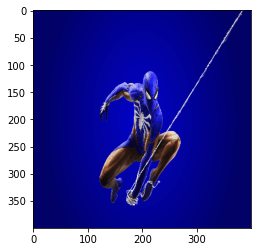

In [4]:
plt.imshow(img)

## You'll see an image turned blue to and that is because when you read the picture using ***cv2.imshow*** the color's canal have been inversed. Normally, we have an RGB image so the canals would be in that order R, G, B but they were changed.  Honestly, it doesn't affect so much but if you want to have your canals in the correct order or read the image using plt.imread, you need to inverse them. We will make a small function to do that.

In [5]:
def InverseCanal(image):
    # First we will split the image in to three arrays 
    
    B,G,R = cv2.split(image)
    
    # Now we will merge
    image = cv2.merge([R,G,B])
    
    return image

In [6]:
img = InverseCanal(img)

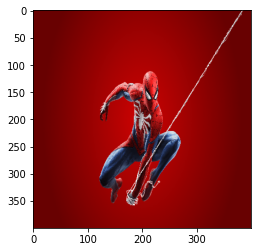

In [7]:
plt.imshow(img)

# We changed the order of canals and we get the original image.



# Now, let's implement the HoG approach

## We will calculate the gradient of the image. 

### Define the gradient : 
The **Gradient** represent the first derivation of the image. We can calculate the gradient by using filters like ***Sobel** or ***Prewit*** .

The gradient is calculated for axis X and the Y axis so we have to gradient **Gx and Gy**.


In [8]:
## We'll use the Sobel Filter with kernel = 3 and we give a float image 

Gx = cv2.Sobel(np.float32(img) / 255.0 , cv2.CV_32F, 1, 0, ksize = 3)

Gy = cv2.Sobel(np.float32(img) / 255.0  , cv2.CV_32F, 0,1, ksize = 3 )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


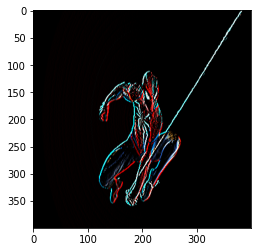

In [9]:
plt.imshow(Gx)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


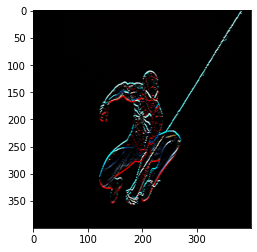

In [10]:
plt.imshow(Gy)

## Find the module and direction of the gradient :
### For the module the formula is : $$\sqrt{Gx² + Gy²}$$
### For the direction : $$ \sigma = \arctan{\frac{Gx}{ Gy}}$$

In [11]:
module , direction = cv2.cartToPolar(Gx, Gy, angleInDegrees=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


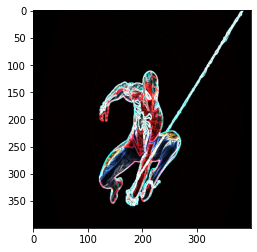

In [12]:
plt.imshow(module)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


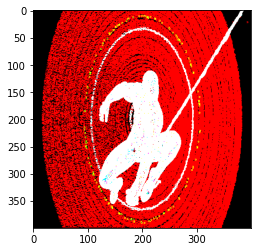

In [13]:
plt.imshow(direction)

## Now, We will calculate the hog histogram and show the features. I'll use the HOG methode implemented in the skimage library. At this stage, we'll compute the gradient for each cell then concatenate them. The result will be a histogram with the number of orientation you want.

In [107]:
from skimage.feature import hog
from skimage import exposure

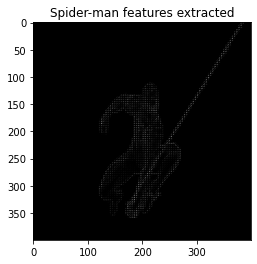

In [113]:
# About the parameters :
"""
* Orientations :  represent the numbre angles like [0,20,40,60,80,100,120,140,160]
* Pixel_per_cell : we choose a cell of 4x4 so we have 16 pixels for one cell
* Cell_per_block : for one block we have 16 cells 
"""
fd, hog_image = hog(img, orientations=9, pixels_per_cell=(4, 4),cells_per_block=(4, 4), visualize=True, multichannel=True)
plt.title("Spider-man features extracted")
plt.imshow(hog_image, cmap="gray")


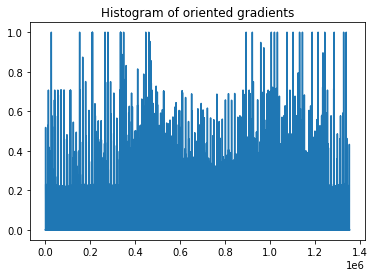

In [114]:
plt.title("Histogram of oriented gradients")
plt.plot(fd)

# We have completed our work. I really hope that notebook can help you.
# Please feel free to criticize this notebook, I start learning recently some skills of compture vision and image processing and I want to improve my skills. Thank you for the reading.